In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scienceplots
import cv2 as cv
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
np.random.seed(137)




# Example of plot

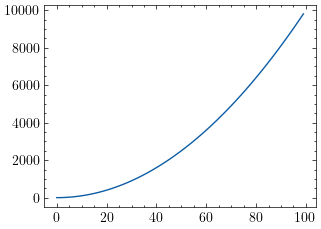

In [2]:
plt.style.use('science')
x=np.arange(100)
y=x**2
with plt.style.context('science'):
    plt.figure()
    plt.plot(x, y)
    plt.show()

# Load Image

In [3]:
im=cv.imread("/Users/Hoang_1/Desktop/Master_Arbeit/software/janus_particle_tracking/Image_Data/Aufnahmen_JPEG_06_07_take_2/Hoang_07_06_2023_Aufnahmen_Rollen_Partikel_Rollen_12_mu_200_002_t193.jpg", cv.IMREAD_GRAYSCALE)
X=im.reshape((-1))


# Plot Image

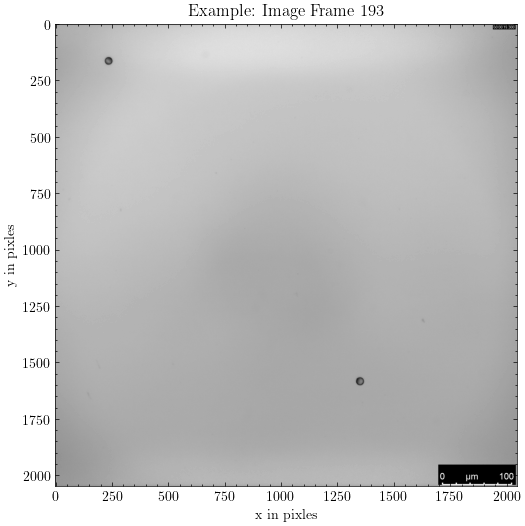

In [4]:
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [6, 6]
    ax=plt.figure()
    plt.title("Example: Image Frame 193")
    plt.xlabel("x in pixles")
    plt.ylabel("y in pixles")
    plt.imshow(im, cmap="gray")
    plt.show()

# Plot Data

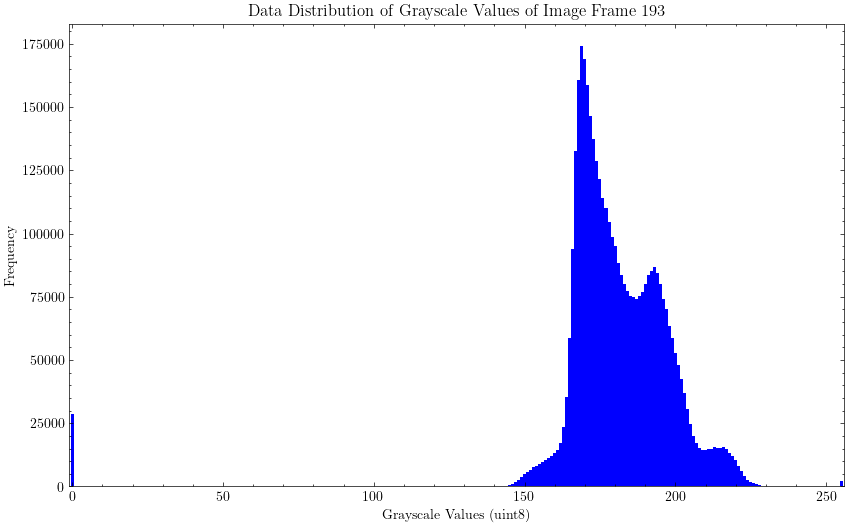

In [5]:
bins=np.arange(257)-0.5
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [10, 6]
    ax=plt.figure()
    plt.title("Data Distribution of Grayscale Values of Image Frame 193")
    counts, bins, patches = plt.hist(X, bins=bins, histtype='bar',color="blue")
    plt.xlabel("Grayscale Values (uint8)")
    plt.ylabel("Frequency")
    plt.xlim(-1, 256)
    plt.show()

# Train K means on Data

In [6]:
X=X.reshape((-1,1))
K=3
kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(X)
labels=kmeans.labels_.reshape((-1))
means=kmeans.cluster_centers_.reshape((-1))


# Visualize K means labeling

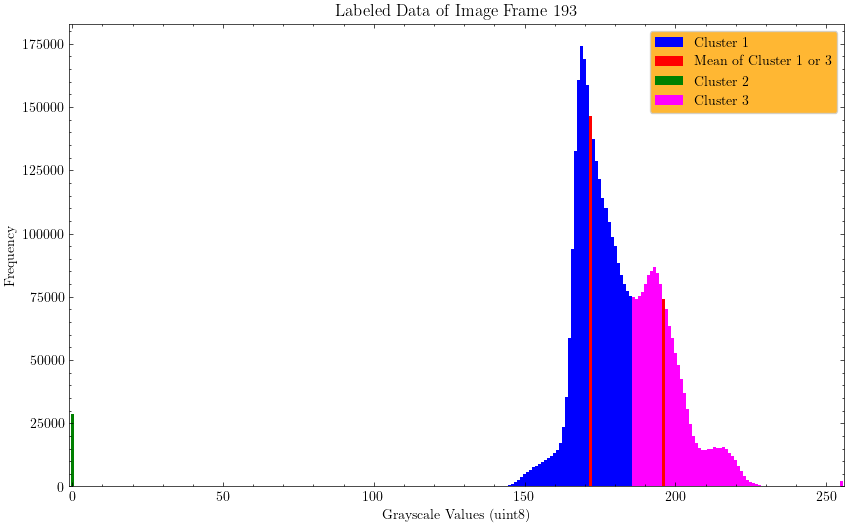

In [7]:
Y1=X[labels==0,0]
Y2=X[labels==1,0]
Y3=X[labels==2,0]



index=np.zeros(K,dtype=int)
for i in range(K):
    index[i]=np.where((bins>means[i]))[0][0]-2

with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [10, 6]
    ax=plt.figure()
    plt.title("Labeled Data of Image Frame 193")
    counts, __, patches = plt.hist(Y1, bins=bins, histtype='bar',color="blue", label="Cluster 1")
    for i in range(K):
        patches[index[i]].set_fc('r')
    plt.hist(counts[index[0]], bins=bins[index[0]:index[0]+2], histtype='bar',color="red", label="Mean of Cluster 1 or 3")
    counts, __, patches = plt.hist(Y2, bins=bins, histtype='bar',color="green", label="Cluster 2")
    for i in range(K):
        patches[index[i]].set_fc('r')
    counts, __, patches = plt.hist(Y3, bins=bins, histtype='bar',color="magenta", label="Cluster 3")
    for i in range(K):
        patches[index[i]].set_fc('r')
    plt.xlabel("Grayscale Values (uint8)")
    plt.ylabel("Frequency")
    plt.xlim(-1, 256)
    plt.legend(frameon=True, facecolor="orange")
    plt.show()

# Visualize on Image

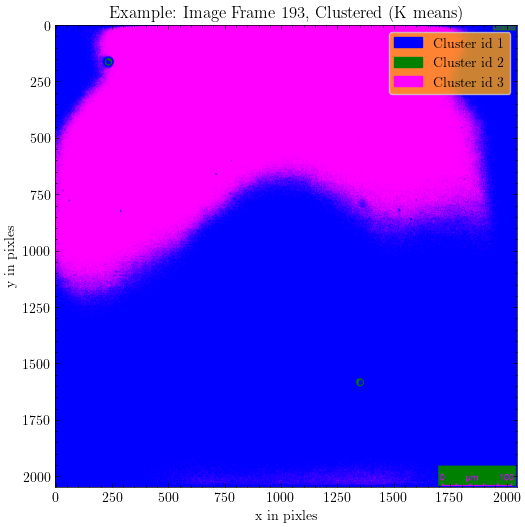

In [8]:
Im_labeled=np.zeros((im.shape[0],im.shape[1],3),dtype=np.uint8)
blue=np.array([0,0,255]).reshape((1,1,3))
green=np.array([0,128,0]).reshape((1,1,3))
magenta=np.array([255,0,255]).reshape((1,1,3))
colors=[blue, green, magenta]
a=np.arange(im.size)
for i in range(K):
    b=a[labels==i]
    index=np.unravel_index(b, im.shape)
    Im_labeled[index[0],index[1],:]=colors[i]


with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [6, 6]
    ax=plt.figure()
    plt.title("Example: Image Frame 193, Clustered (K means)")
    plt.xlabel("x in pixles")
    plt.ylabel("y in pixles")
    blue_patch = mpatches.Patch(color='blue', label='Cluster id 1')
    green_patch = mpatches.Patch(color='green', label='Cluster id 2')
    magenta_patch = mpatches.Patch(color='magenta', label='Cluster id 3')
    plt.legend(handles=[blue_patch, green_patch, magenta_patch],frameon=True, facecolor="orange")
    plt.imshow(Im_labeled)
    plt.show()
